## Copyright Note


## Deep Learning Reference 1
**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron  (Author)**[ relative links](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
## Deep Learning Reference 2

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Deep Learning with Python by Francois Chollet (2018)**[relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

**Other examples are adapted from wiki and internet resources**


<b> This lecture contains information about regularization. Please read reference 1, the links below, and the instructor lectures in ML to have necessary background. </b>

## Learning concepts:

1. Give a quick review to Keras (Sequential API) and MLP.
      - Fully-Connected (Dense) NN
2. [How to select input_shape](https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc)
3. A difference between Sequential and Functional API.
4. Skim over the [Learning Curves for overfitting and underfitting](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) 
5. What is regularization and early stopping.
6. Visualization using [tensorboard](https://www.tensorflow.org/tensorboard/get_started).
7. Hyperparameter tuning. 

## Using Sequential API

### Regression MLP
<b> Let's load, split and scale [the California housing dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)</b>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:
mse_test = model.evaluate(X_test, y_test)

## Building Complex Models Using the Functional API
In [the paper](https://arxiv.org/abs/1606.07792), authors connect all or part of the inputs directly to the output layer as in the below figure. This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path).

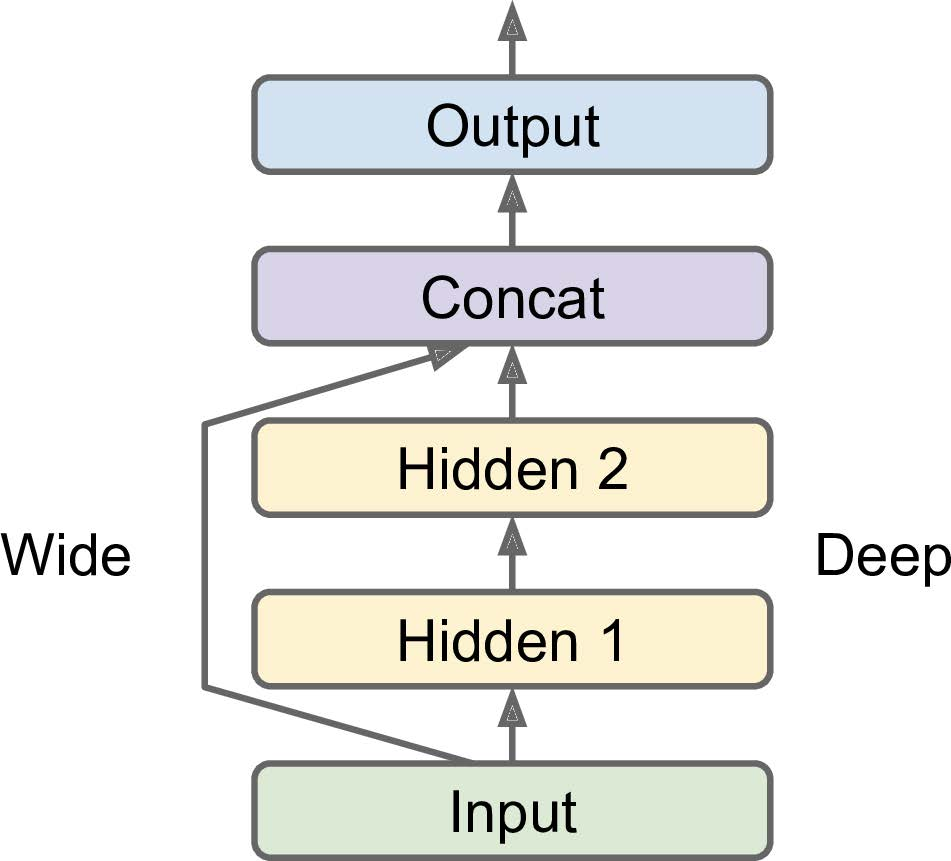

In [ ]:
X_train.shape[1:]

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])


In [ ]:
model.summary()

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:
mse_test = model.evaluate(X_test, y_test)

## Handling Multiple Inputs

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7).  



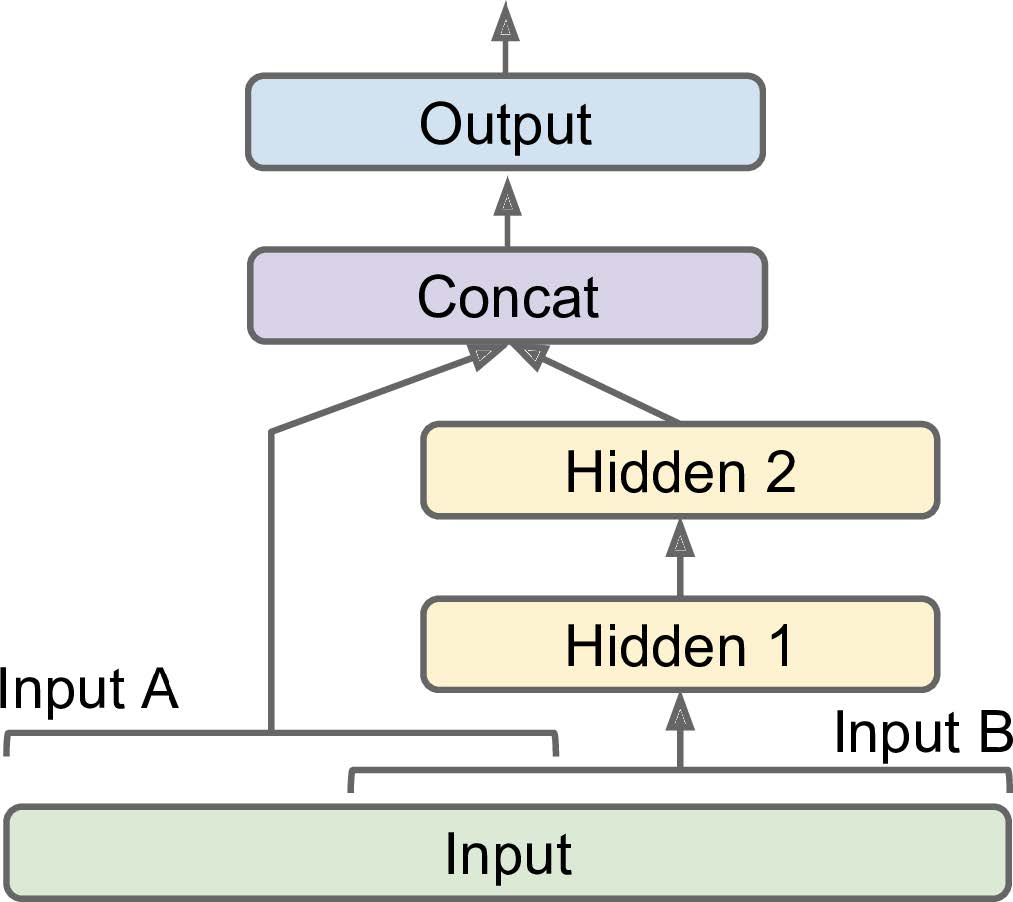

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

## [Regularization](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a) 

<b> This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. [useful link](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a) <b> 

Examples of regularization:
- L1 norm
- L2 norm
- Early stopping
- dropout 



## Multiple Outputs (Auxiliary Output)

- You may need to have regression and classification at the same time.
- You may have multiple independent tasks to perform based on the
same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.
- A s a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-15) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

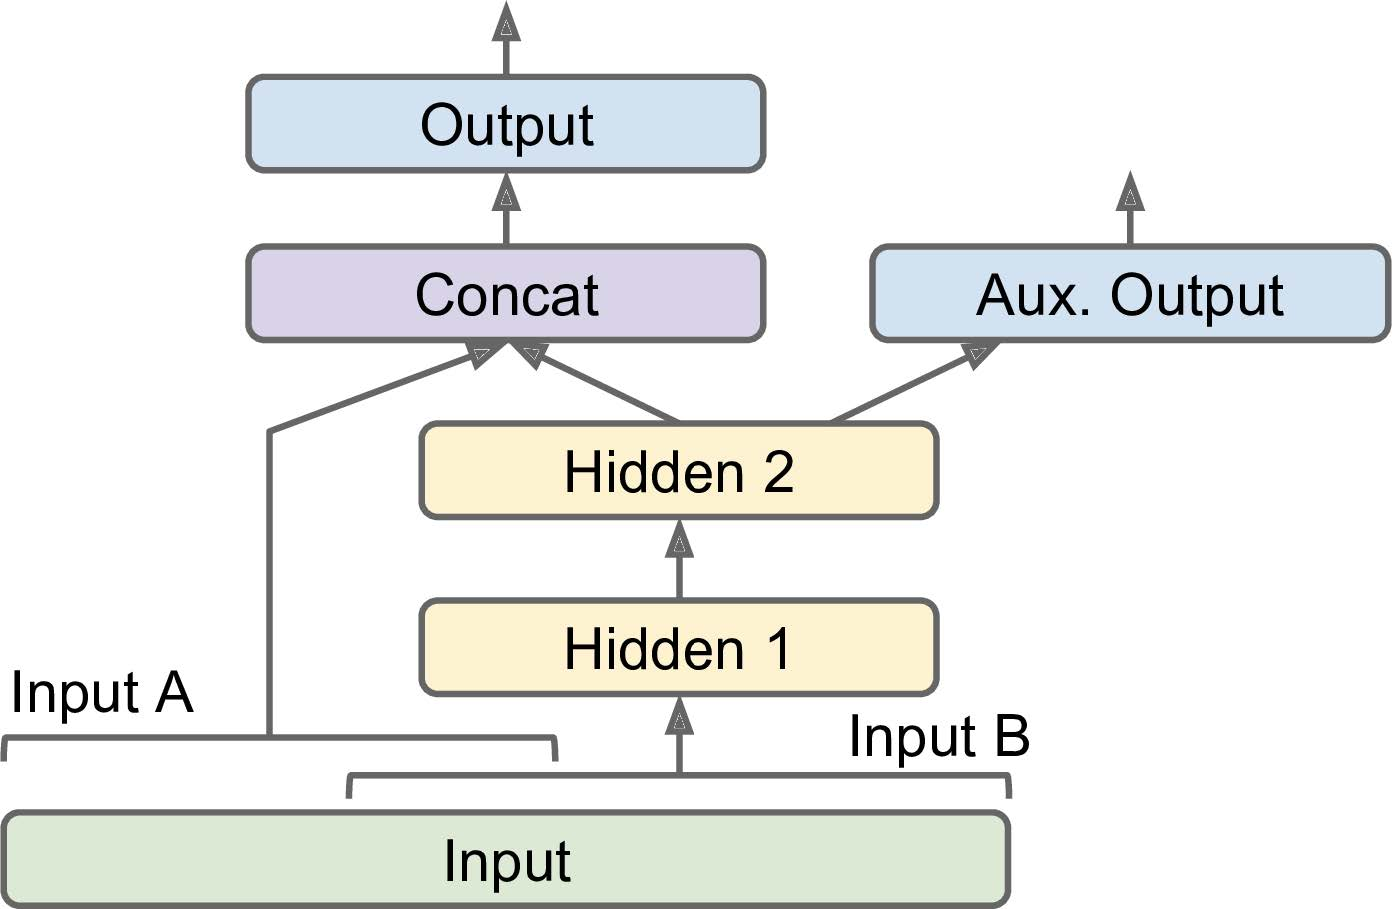

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
print(concat)

In [ ]:
print(input_A,input_B)

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

## Saving and Restoring Model

In [Keras](https://machinelearningmastery.com/save-load-keras-deep-learning-models/) and [scikit-learn](https://scikit-learn.org/stable/modules/model_persistence.html), you can save the model and call it back as needed!

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
model.predict(X_test)

In [ ]:
model.save_weights("my_keras_weights.ckpt")

In [ ]:
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch.

## [Early Stopping](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/) 




A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. (See Reference 1 chapter 4; pg 142) 

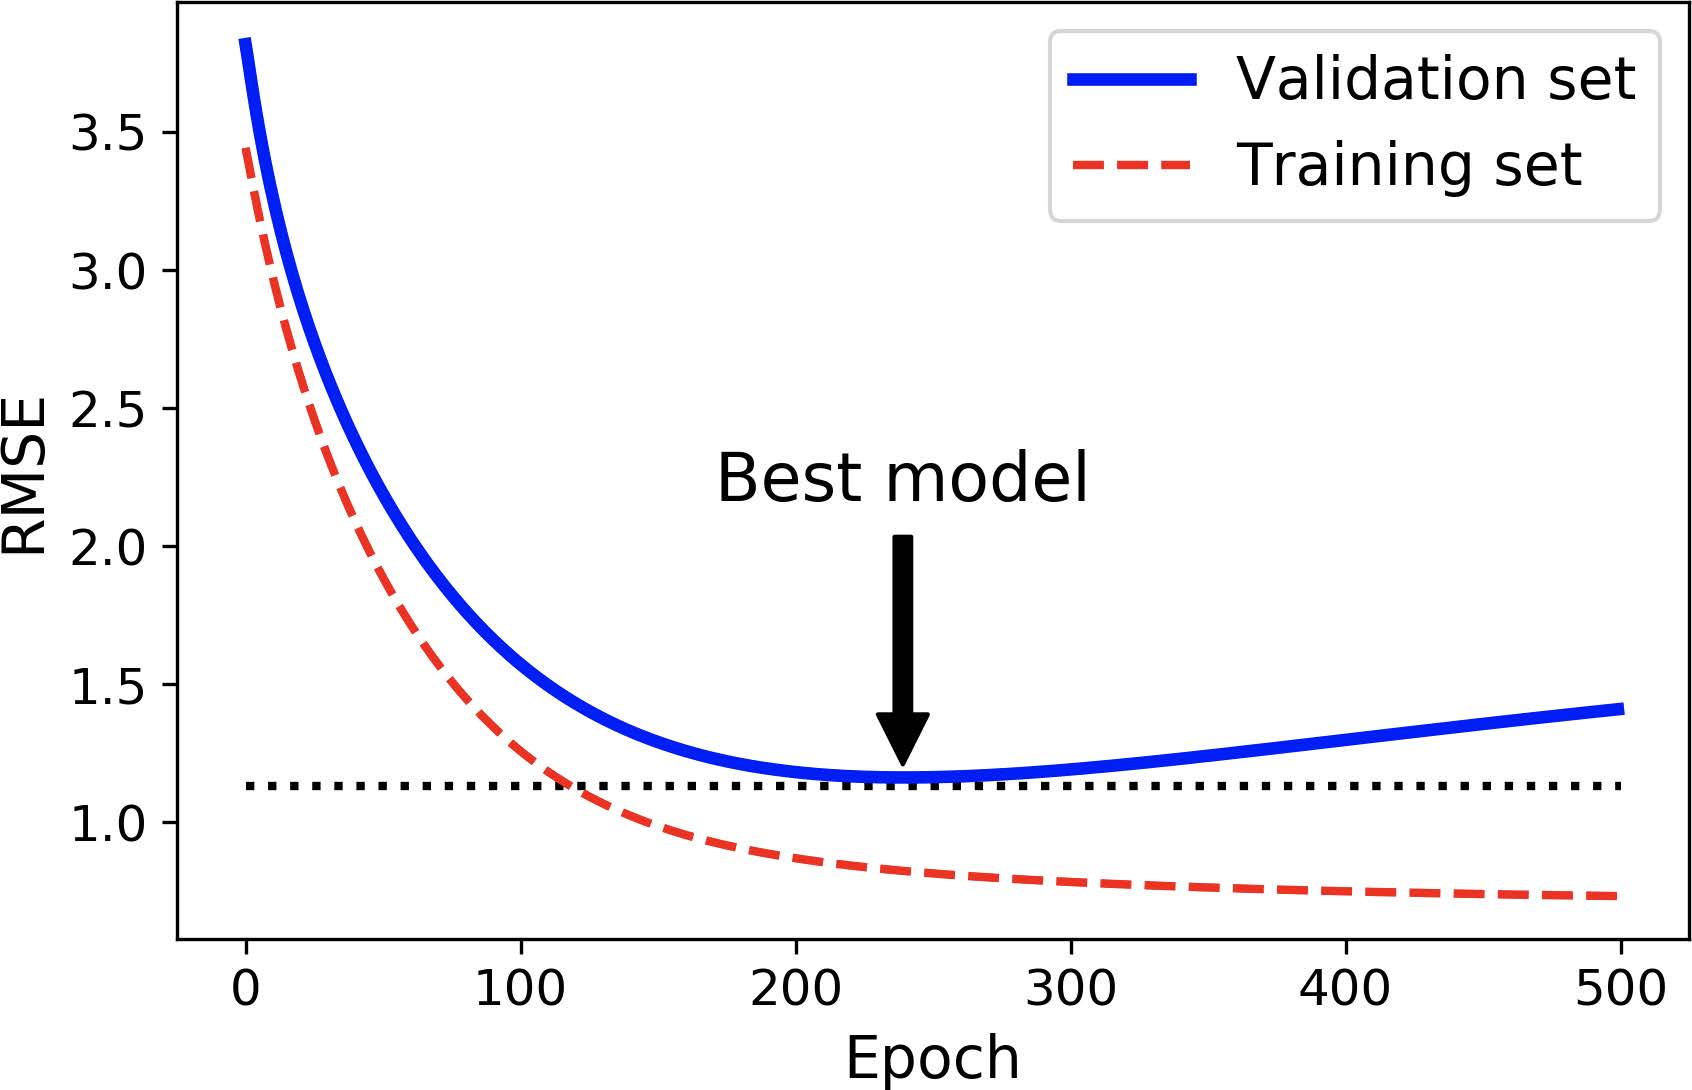

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

 If you use a validation set during training, you can set
save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far.This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model onn the validation set. This is a simple way to implement early stopping

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)


Another way to implement early stopping is to simply use the EarlyStopping call back. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to both save checkpoints of your model (in case your computer crashes), and actually interrupt training early when there is no more progress (to avoid wasting time and resources):

In [ ]:
help(keras.callbacks.EarlyStopping)

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

## Visualization Using TensorBoard

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more! This tool is installed automatically when you install TensorFlow, so you already have it!

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
rm -rf ./my_logs/

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

## Fine-Tuning Neural Network Hyperparameters

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Develop Baseline Model for Keras Regressor

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

# Encode classes as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# One hot encode integer labels
one_hot_Y = np_utils.to_categorical(encoded_Y)

In [ ]:
from sklearn.model_selection import KFold

# Create the k-folds cross-validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def get_model():
    # Create model
    model = Sequential()
    model.add(Dense(10, input_dim=4))
    model.add(Dense(3, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:
num_epochs = 20
train_scores = []
test_scores = []
fold_index = 1

# Train model for each fold
for train, test in kfold.split(X, one_hot_Y):

    # Create model
    model = get_model()

    # Fit the model
    history = model.fit(
        X[train],
        one_hot_Y[train],
        validation_data=(X[test], one_hot_Y[test]),
        epochs=num_epochs,
        batch_size=5,
        verbose=0
    )

    # Preserve the history and print out some basic stats
    train_scores.append(history.history['accuracy'])
    test_scores.append(history.history['val_accuracy'])
    print("Fold %d:" % fold_index)
    print("Training accuracy: %.2f%%" % (history.history['accuracy'][-1]*100))
    fold_index += 1

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure()
plt.title('Cross-Validation Performance')
plt.ylim(0.2, 1.01)
plt.xlim(0, num_epochs-1)
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid()

import numpy as np

# Calculate mean and distribution of training history
train_scores_mean = np.mean(train_scores, axis=0)
train_scores_std = np.std(train_scores, axis=0)
test_scores_mean = np.mean(test_scores, axis=0)
test_scores_std = np.std(test_scores, axis=0)

# Plot the average scores
plt.plot(
    train_scores_mean,
    '-',
    color="b",
    label="Training score"
)
plt.plot(
    test_scores_mean,
    '-',
    color="g",
    label="Cross-validation score"
)

# Plot a shaded area to represent the score distribution
epochs = list(range(num_epochs))
plt.fill_between(
    epochs,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="b"
)
plt.fill_between(
    epochs,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g"
)

plt.legend(loc="lower right")
plt.show()